In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('file5.csv')

In [4]:
df.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,0,4.770057,4.598420,0.570520,-3.377520,0.352645,-0.136847,0.278055,1.869947,0.377328,1.233692,0
1,1,-3.896590,1.425879,0.099658,-1.241758,-1.307201,0.486471,0.825756,0.025243,0.133589,-0.334614,0
2,2,0.541838,2.872118,0.091530,-0.827609,-0.793905,0.357727,0.035772,-0.516540,-0.028116,-0.525921,0
3,3,10.184893,-2.250180,0.152697,-1.065936,1.193516,-1.739212,-2.705527,0.337772,0.576435,0.523831,0
4,4,-1.314426,2.673825,2.767196,-1.370687,0.020119,2.729044,0.218235,0.192596,0.604500,-0.491879,0


In [5]:
df.describe()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
count,707.000000,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,707.000000
mean,353.000000,-1.256264e-17,2.638154e-16,6.689604e-17,-1.127497e-16,5.873033e-17,-1.334780e-17,3.745236e-17,1.515368e-17,7.883055e-17,-8.008681e-18,0.309760
std,204.237607,3.071608e+00,2.961820e+00,1.919978e+00,1.514968e+00,1.210683e+00,9.844647e-01,8.018145e-01,7.517227e-01,6.593221e-01,6.125629e-01,0.462722
min,0.000000,-5.737279e+00,-7.370550e+00,-4.055472e+00,-3.377520e+00,-3.517539e+00,-4.267489e+00,-2.814507e+00,-2.783766e+00,-2.869700e+00,-3.043301e+00,0.000000
25%,176.500000,-2.542896e+00,-2.050597e+00,-1.260120e+00,-8.269360e-01,-7.527204e-01,-4.715905e-01,-4.191576e-01,-4.667277e-01,-4.536531e-01,-3.157654e-01,0.000000
50%,353.000000,-5.220181e-01,-3.295635e-01,-3.267263e-01,-3.613712e-02,-8.327131e-02,-8.049774e-02,1.724362e-02,-8.353459e-02,6.633541e-02,3.007257e-03,0.000000
75%,529.500000,2.669614e+00,2.345097e+00,1.557080e+00,9.833059e-01,8.092089e-01,5.681760e-01,5.563298e-01,4.069576e-01,3.583839e-01,4.035497e-01,1.000000
max,706.000000,1.231882e+01,1.652941e+01,1.223210e+01,6.476754e+00,3.901839e+00,6.610602e+00,3.250504e+00,5.860221e+00,3.661796e+00,3.196938e+00,1.000000


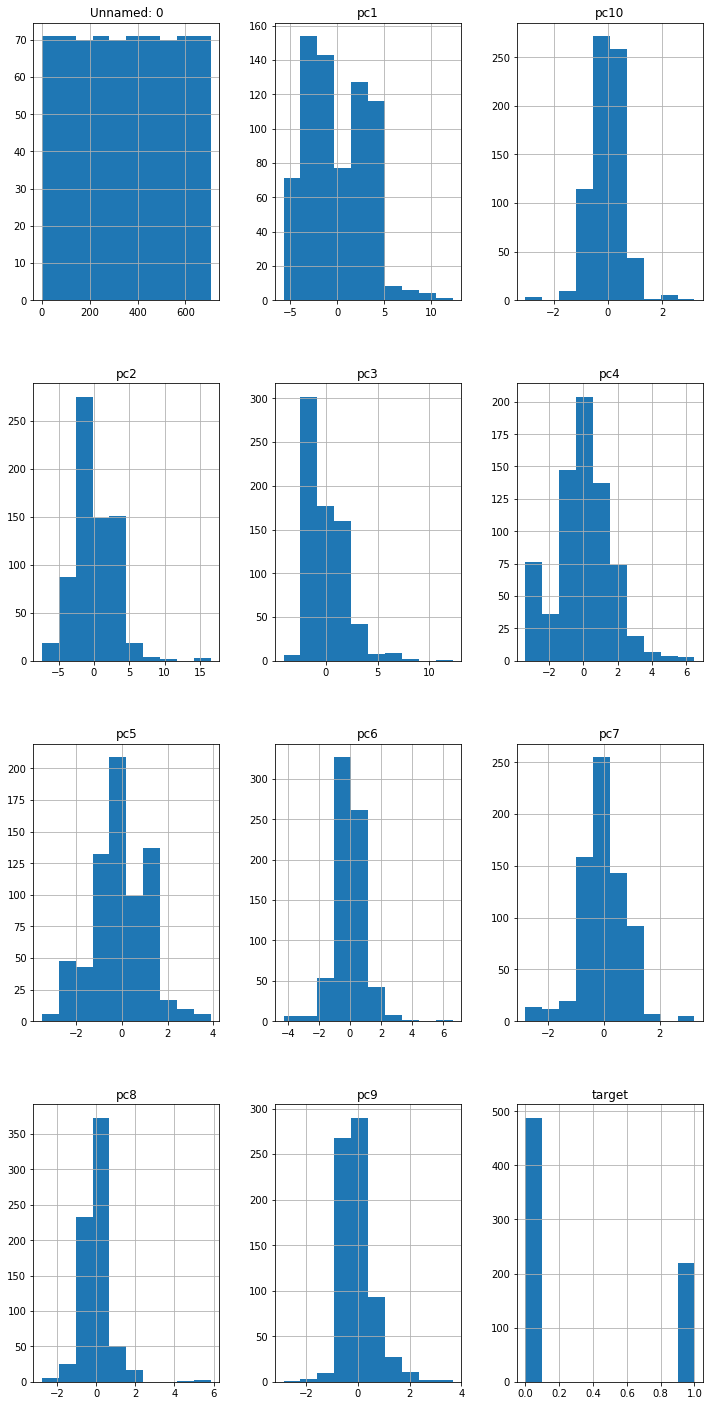

In [6]:
df.hist(figsize = (12, 25))
plt.show()

In [7]:
good = df[df['target']==0]
bad = df[df['target']==1]

outlier_fraction = len(bad)/float(len(good))
outlier_fraction

0.4487704918032787

In [8]:
print("No. of normal : {}".format(len(good)))
print("No. of anomaly : {}".format(len(bad)))

No. of normal : 488
No. of anomaly : 219


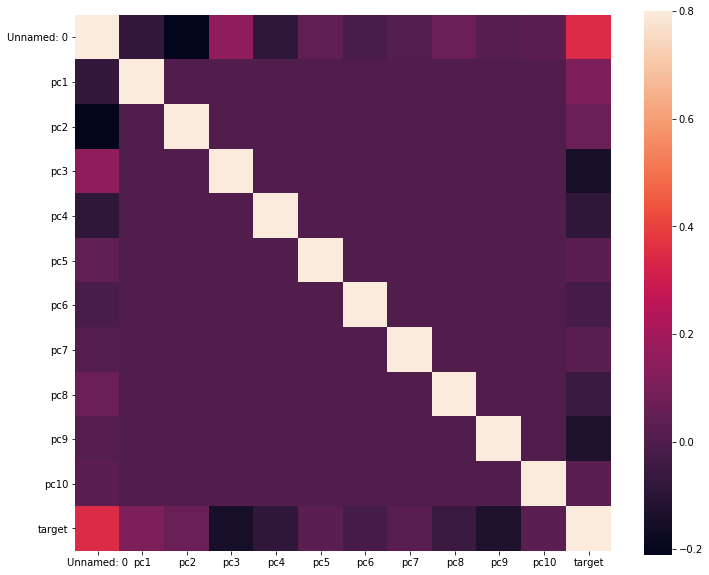

In [9]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [10]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['target']]
target = 'target'

In [11]:
columns

['Unnamed: 0',
 'pc1',
 'pc2',
 'pc3',
 'pc4',
 'pc5',
 'pc6',
 'pc7',
 'pc8',
 'pc9',
 'pc10']

In [12]:
X = df[columns]
y = df[target]
print(X.shape)
print(y.shape)

(707, 11)
(707,)


In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [14]:
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = 1 ),
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction )
}
#fiting the data into different model and predicting the output 
n_outlier = len(bad)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    print('{}: {}'.format(clf_name, n_errors))
    print('Accuracy Score : {}'.format(accuracy_score(y, y_pred)))
    print((classification_report(y, y_pred)))

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest: 412
Accuracy Score : 0.41725601131541723
              precision    recall  f1-score   support

           0       0.60      0.48      0.53       488
           1       0.20      0.28      0.23       219

   micro avg       0.42      0.42      0.42       707
   macro avg       0.40      0.38      0.38       707
weighted avg       0.47      0.42      0.44       707

Local Outlier Factor: 348
Accuracy Score : 0.5077793493635078
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       488
           1       0.23      0.25      0.24       219

   micro avg       0.51      0.51      0.51       707
   macro avg       0.44      0.44      0.44       707
weighted avg       0.52      0.51      0.51       707



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


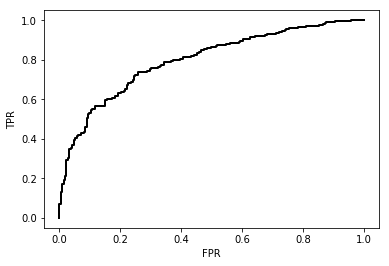

In [15]:
from sklearn.datasets import load_breast_cancer
X, y  = load_breast_cancer(return_X_y=True)

from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=0, contamination='auto')
clf.fit(X)
y_pred = clf.score_samples(X)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()